In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
european_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", 
    "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", 
    "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", 
    "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", 
    "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", 
    "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", 
    "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom", 
    "Vatican City"
]

df_DA_europe = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'].isin(european_countries))].copy()
df_DA_europe['job_posted_month'] = df_DA_europe.job_posted_date.dt.month
df_skills = df_DA_europe.explode('job_skills')
df_pivot = df_skills.pivot_table(index = 'job_posted_month',columns = 'job_skills' , aggfunc = 'size', fill_value= 0)
df_pivot.loc['Total'] = df_pivot.sum()
df_pivot = df_pivot[df_pivot.loc['Total'].sort_values(ascending = False).index]
df_pivot = df_pivot.drop('Total')
df_pivot

job_skills,sql,python,excel,power bi,tableau,r,sas,sap,azure,powerpoint,...,firestore,mlr,esquisse,f#,workfront,nuxt.js,blazor,xamarin,cordova,ovh
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,3832,2412,2424,1842,1663,1173,1114,553,549,444,...,2,0,0,0,0,1,0,0,0,0
2,3039,1934,1893,1456,1388,946,884,464,454,309,...,0,0,0,0,1,0,0,0,0,0
3,2799,1871,1742,1351,1272,909,808,410,413,324,...,0,0,0,0,0,0,1,0,0,0
4,2617,1752,1634,1313,1130,797,774,414,389,295,...,0,0,0,1,0,0,0,0,0,1
5,2360,1572,1455,1153,988,672,566,363,365,242,...,0,0,0,0,0,0,0,0,0,0
6,2697,1760,1745,1372,1113,750,652,436,395,294,...,0,0,0,0,0,0,0,0,0,0
7,2681,1777,1748,1428,1153,802,586,438,446,296,...,0,0,0,0,0,0,0,0,0,0
8,2560,1709,1662,1360,1115,792,626,483,438,224,...,0,0,0,0,0,0,0,0,0,0
9,2369,1568,1507,1257,961,700,488,388,392,217,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Count')

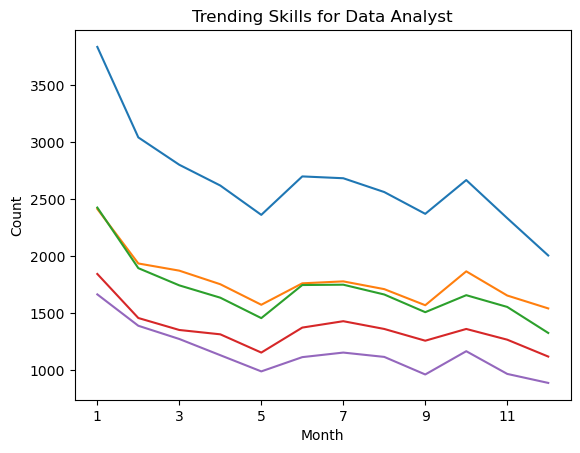

In [4]:
df_pivot.iloc[:,:5].plot(kind = 'line' , legend = False)
plt.title('Trending Skills for Data Analyst')
plt.xlabel('Month')
plt.ylabel('Count')


In [5]:
DA_total = df_skills.groupby('job_posted_month').size()
DA_total_percent = df_pivot.iloc[:12].div(DA_total/100 , axis = 0)
DA_total_percent = DA_total_percent.reset_index()
DA_total_percent['job_posted_month'] = DA_total_percent['job_posted_month'].apply(lambda x : pd.to_datetime(x,format = '%m').strftime('%b'))
DA_total_percent = DA_total_percent.set_index('job_posted_month')
DA_total_percent

job_skills,sql,python,excel,power bi,tableau,r,sas,sap,azure,powerpoint,...,firestore,mlr,esquisse,f#,workfront,nuxt.js,blazor,xamarin,cordova,ovh
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,14.108464,8.880380,8.924561,6.781783,6.122750,4.318692,4.101469,2.036008,2.021281,1.634697,...,0.007363,0.00000,0.000000,0.000000,0.000000,0.003682,0.000000,0.000000,0.000000,0.000000
Feb,14.332877,9.121351,8.927982,6.866953,6.546243,4.461633,4.169221,2.188370,2.141206,1.457341,...,0.000000,0.00000,0.000000,0.000000,0.004716,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,14.046269,9.389271,8.741908,6.779746,6.383299,4.561650,4.054800,2.057510,2.072565,1.625935,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.005018,0.000000,0.000000,0.000000
Apr,14.204299,9.509336,8.868867,7.126574,6.133304,4.325879,4.201042,2.247069,2.111376,1.601172,...,0.000000,0.00000,0.000000,0.005428,0.000000,0.000000,0.000000,0.000000,0.000000,0.005428
May,14.294367,9.521502,8.812841,6.983646,5.984252,4.070260,3.428225,2.198667,2.210781,1.465778,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,14.199968,9.266572,9.187595,7.223714,5.860054,3.948823,3.432844,2.295583,2.079714,1.547939,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,14.117957,9.357557,9.204845,7.519747,6.071617,4.223275,3.085835,2.306477,2.348605,1.558715,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,13.756784,9.183728,8.931162,7.308292,5.991724,4.256005,3.363964,2.595518,2.353700,1.203719,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,14.118839,9.345015,8.981465,7.491507,5.727397,4.171882,2.908397,2.312414,2.336254,1.293283,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


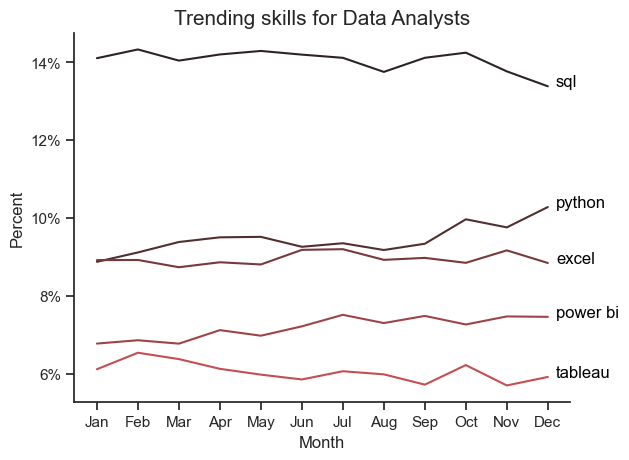

In [15]:
from matplotlib.ticker import PercentFormatter
df_plot = DA_total_percent.iloc[:,:5]
sns.set_theme(style= 'ticks')
sns.lineplot(data=df_plot,dashes = False,legend = False , palette = 'dark:r')
sns.despine()
plt.title('Trending skills for Data Analysts',fontsize = 15)
plt.ylabel('Percent')
plt.xlabel('Month')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()